## Affine 2D Transformation

$ \begin{pmatrix}\widetilde{r} \\ \widetilde{c}\end{pmatrix}
    = \begin{pmatrix}a_{11} & a_{12} \\ a_{21} & a_{22}\end{pmatrix}
    \begin{pmatrix}r \\ c\end{pmatrix} +
    \begin{pmatrix}t_r \\ t_c\end{pmatrix}
$

$ \begin{pmatrix}\widetilde{r} \\ \widetilde{c} \\ 1\end{pmatrix}
    = \begin{pmatrix}a_{11} & a_{12} & t_r\\ a_{21} & a_{22} & t_c\\
    0 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix}r \\ c \\ 1\end{pmatrix}
$

Bilder werden transformiert, indem für jeden Punkt im Ergebnisbild berechnet wird, wo er im Eingabebild liegt und ein entsprechender Grauwert zugewiesen wird.

### Translation

$ \begin{pmatrix}\widetilde{r} \\ \widetilde{c} \\ 1\end{pmatrix} = \begin{pmatrix}1 & 0 & t_r  \\ 0 & 1 & t_c \end{pmatrix}
\begin{pmatrix}r \\ c \\ 1\end{pmatrix}
$

#### Reverse

$
\begin{pmatrix}r \\ c \\ 1\end{pmatrix}
 = \begin{pmatrix}1 & 0 & t_r  \\ 0 & 1 & t_c \end{pmatrix}^{-1} \begin{pmatrix}\widetilde{r} \\ \widetilde{c} \\ 1\end{pmatrix}
$

### Example: Shift image by a vector v

$ v = \begin{pmatrix}10 \\ 10\end{pmatrix} \\
t_c = 10, t_r = 10$


$
\begin{pmatrix}r \\ c \\ 1\end{pmatrix}
 = \begin{pmatrix}1 & 0 & 10  \\ 0 & 1 & 10 \end{pmatrix}^{-1} \begin{pmatrix}\widetilde{r} \\ \widetilde{c} \\ 1\end{pmatrix}
$


$\widetilde{r} = 1r + 1t_r \Leftrightarrow r = \widetilde{r} - t_r\\
\widetilde{c} = 1s + 1t_c  \Leftrightarrow c = \widetilde{c} - t_c
$

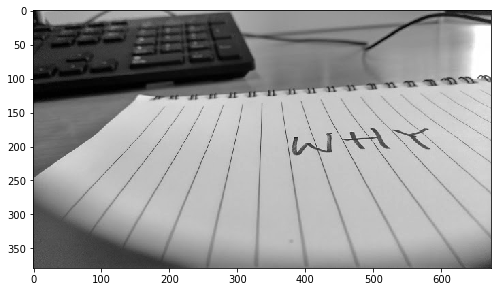

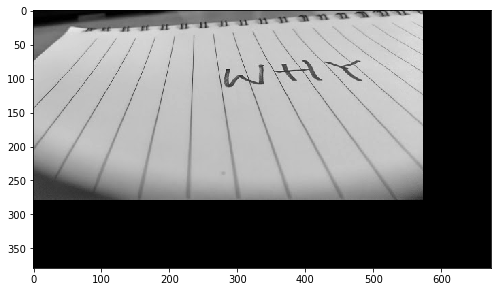

In [3]:
import img_reader as rd
import numpy as np
from numpy.linalg import inv

img = rd.read_gray("images/01-why1.jpg")
rd.show_img(img)

translation = np.matrix( [[1,0,10],[0,1,0]] )
t_c = -100
t_r = -100

img.shape
transl_img = np.zeros(img.shape)

width  = len(transl_img[1])
height = len(transl_img)

# setting range
x_range = range(t_r, width) if t_r > 0 else range(0, width + t_r)
y_range = range(t_c, height) if t_c > 0 else range(0, height + t_c)

for y in y_range:
    for x in x_range:
        original_point = x - t_r, y - t_c
        transl_img[y][x] = img[original_point[1]][original_point[0]]
        
rd.show_img(transl_img)

### Skalierung in Zeile und Spalte

$\begin{pmatrix}s_r & 0 & 0  \\ 0 & s_c & 0 \end{pmatrix}$
<br><br>
$
\begin{pmatrix}\widetilde{r} \\ \widetilde{c} \\ 1\end{pmatrix} = \begin{pmatrix}s_r & 0 & 0  \\ 0 & s_c & 0 \\ 0&0&1 \end{pmatrix}
\begin{pmatrix}r \\ c \\ 1\end{pmatrix} $
<br><br>
$\begin{pmatrix}r \\ c \\ 1\end{pmatrix} = \begin{pmatrix}s_r & 0 & 0  \\ 0 & s_c & 0 \\ 0&0&1 \end{pmatrix}^{-1}
\begin{pmatrix}\widetilde{r} \\ \widetilde{c} \\ 1\end{pmatrix}
$

#### Example: scale image by factor v

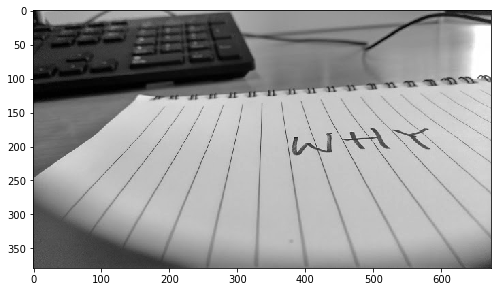

In [38]:
s_r = 1
s_c = 1

scale_matrix = np.matrix([[s_r, 0, 0], [0, s_c, 0], [0, 0, 1] ])
inv_scale_matrix = scale_matrix.I

height = int(img.shape[0]*s_c)
width  = int(img.shape[1]*s_r)

scaled_img = np.zeros((height, width))
"""
aux_array = np.array([0,0,1])
aux_array2= np.array([img.shape[1], img.shape[0],1])
for x in range(0, width):
    for y in range(0, height):
        
        scaled_pos = np.array([x, y, 1])
        original_position = np.dot(inv_scale_matrix, scaled_pos).astype(int)
    
        original_position = np.asarray(original_position).flatten()
        
        if (original_position >= aux_array).all() \
            and (original_position <= aux_array2).all():
            scaled_img[y][x] = img[original_position[1]][original_position[0]]
rd.show_img(scaled_img)
"""

img2 = np.zeros((height, width))
height = img2.shape[0]
width  = img2.shape[1]

# put into function
def affine_transformation(trans_matrix, img, new_img):
    height = new_img.shape[0]
    width  = new_img.shape[1]
    
    aux_array = np.array([0,0,1])
    aux_array2= np.array([img.shape[1]-1, img.shape[0]-1,1])
    
    inv_trans_matrix = trans_matrix.I
    
    for x in range(0, width):
        for y in range(0, height):
        
            scaled_pos = np.array([x, y, 1])
            original_position = np.dot(inv_trans_matrix, scaled_pos).astype(int)
    
            original_position = np.asarray(original_position).flatten()
        
            if (original_position >= aux_array).all() \
                and (original_position <= aux_array2).all():
                new_img[y][x] = img[original_position[1]][original_position[0]]

affine_transformation(scale_matrix, img, img2)
rd.show_img(img2)

### Rotation um $\alpha$

$\begin{pmatrix}\cos\alpha & -\sin\alpha & 0  \\ \sin\alpha & \cos\alpha & 0 \end{pmatrix}$

#### Test using our affine_tranformation function


0.3141592653589793
[[ 0.95105652 -0.30901699  0.        ]
 [ 0.30901699  0.95105652  0.        ]
 [ 0.          0.          1.        ]]


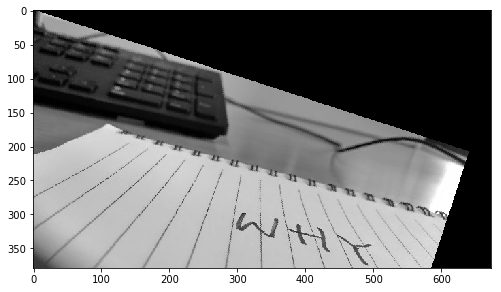

In [35]:
import math

alpha = math.pi/10.
print(alpha)
rot_matrix = np.matrix([[math.cos(alpha), -math.sin(alpha), 0],
                       [math.sin(alpha), math.cos(alpha), 0],
                       [0,0,1]])
print(rot_matrix)

img2 = np.zeros((height, width))

affine_transformation(rot_matrix, img, img2)
rd.show_img(img2)

### Scherung der Zeilen-Achse um $\theta$

$\begin{pmatrix}\cos\theta & 0 & 0  \\ \sin\theta & 1 & 0 \end{pmatrix}$

1.5707963267948966
[[ 0.95105652  0.          0.        ]
 [ 0.30901699  1.          0.        ]
 [ 0.          0.          1.        ]]


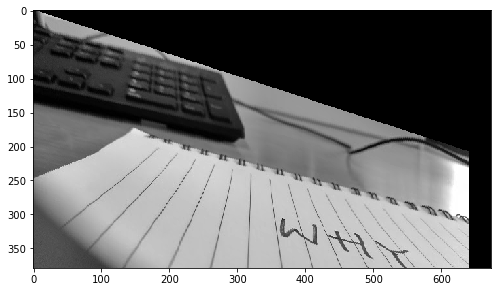

In [37]:
theta = math.pi/2.
print(theta)
scherung = np.matrix([[math.cos(alpha), 0, 0],
                       [math.sin(alpha), 1, 0],
                       [0,0,1]])
print(scherung)

img2 = np.zeros((height, width))

affine_transformation(scherung, img, img2)
rd.show_img(img2)

### Scaling factor 3

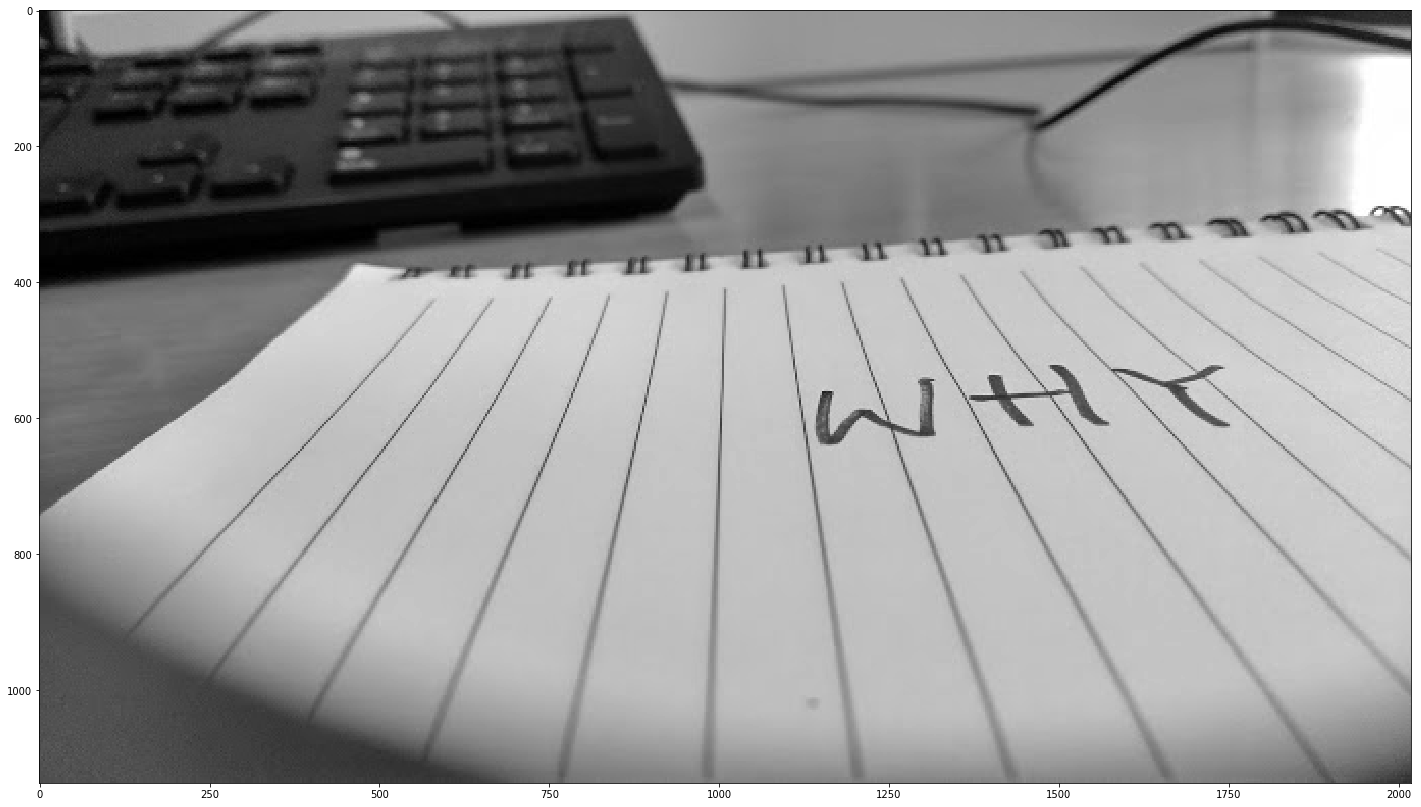

In [41]:
s_r = 3
s_c = 3

scale_matrix = np.matrix([[s_r, 0, 0], [0, s_c, 0], [0, 0, 1] ])
inv_scale_matrix = scale_matrix.I

height = int(img.shape[0]*s_c)
width  = int(img.shape[1]*s_r)

scaled_img = np.zeros((height, width))

affine_transformation(scale_matrix, img, scaled_img)
rd.show_img(scaled_img)

### What if we scale a small image with few pixels?

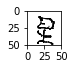

In [42]:
img = rd.read_gray("images/02-stick.jpg")
rd.show_img(img)

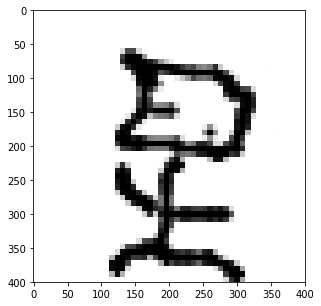

In [48]:
s_r = 8
s_c = 8

scale_matrix = np.matrix([[s_r, 0, 0], [0, s_c, 0], [0, 0, 1] ])
inv_scale_matrix = scale_matrix.I

height = int(img.shape[0]*s_c)
width  = int(img.shape[1]*s_r)

scaled_img = np.zeros((height, width))

affine_transformation(scale_matrix, img, scaled_img)
rd.show_img(scaled_img)

### Result: unsmooth image

### Solutions: Interpolations (Bilinear, Cubic)

Smoothening shrunk images can lead to Aliasing:

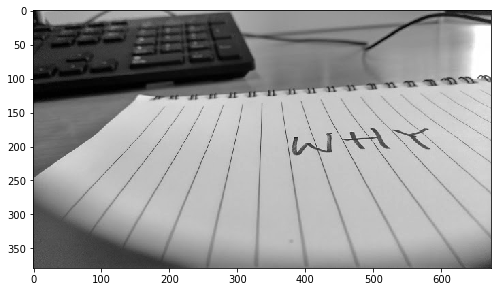

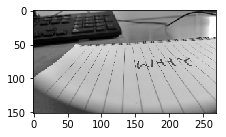

In [51]:
img = rd.read_gray("images/01-why1.jpg")
rd.show_img(img)

s_r = .4
s_c = .4

scale_matrix = np.matrix([[s_r, 0, 0], [0, s_c, 0], [0, 0, 1] ])
inv_scale_matrix = scale_matrix.I

height = int(img.shape[0]*s_c)
width  = int(img.shape[1]*s_r)

scaled_img = np.zeros((height, width))

affine_transformation(scale_matrix, img, scaled_img)
rd.show_img(scaled_img)

## Projektive Transformation

TODO/TO ASK

## Polartransformation (optional)